In [1]:
import matplotlib

import matplotlib.pyplot as plt
import DDFS.analytic_method as am
from DDFS.element import *
from copy import deepcopy
from tqdm.notebook import tqdm
%matplotlib inline
np.set_printoptions(precision=4, suppress=True)

para_p = {
    "type": "steps",
    "maxvalue": 120,
    "minvalue": 2,
    "steps": 100,
    "count": 0
}

para_t = {
    "type": "steps",
    "maxvalue": 0.7,
    "minvalue": 0.1,
    "steps": 4,
    "count": 0
}

para_phi = {
    "type": "even",
    "minvalue": -3.14,
    "maxvalue": 3.14,
}

emit_mode = {
    "p": para_p,
    "theta": para_t,
    "phi": para_phi
}

Detector fast Design & Test package is initialized.


In [2]:
####### 1. Set up the detector, environment, emitter, and particle
e = Environment()
e.update_environment("B", 3)
e.update_environment("position_resolution", True)
e.update_environment("multiple_scattering", True)


m = Emitter()
p = Particle()
p.update_particle("Charge", -1)
p.update_particle("Mass", 0.106)
m.add_particle(p, 1, deepcopy(emit_mode))


d = Detector()

d.add_layer(SiLayer(0.0015, 10, 4000, 0, 9.9, 9.9))
for i in np.linspace(20, 2020, 10):
    d.add_layer(SiLayer(0.002, i, 4000, 1, 0.004, 0.004))

print(d)


Charge has been changed to -1

Mass has been changed to 0.106

Layer Counting: 11
Detector INFO: 
--------------------------------------------------
Idx:0	Material_budget:0.0	 Radius:10	 Half_z:4000	 Efficiency:0	 Loc0:9.9	 Loc1:9.9
Idx:1	Material_budget:0.0	 Radius:20.0	 Half_z:4000	 Efficiency:1	 Loc0:0.0	 Loc1:0.0
Idx:2	Material_budget:0.0	 Radius:242.22	 Half_z:4000	 Efficiency:1	 Loc0:0.0	 Loc1:0.0
Idx:3	Material_budget:0.0	 Radius:464.44	 Half_z:4000	 Efficiency:1	 Loc0:0.0	 Loc1:0.0
Idx:4	Material_budget:0.0	 Radius:686.67	 Half_z:4000	 Efficiency:1	 Loc0:0.0	 Loc1:0.0
Idx:5	Material_budget:0.0	 Radius:908.89	 Half_z:4000	 Efficiency:1	 Loc0:0.0	 Loc1:0.0
Idx:6	Material_budget:0.0	 Radius:1131.11	 Half_z:4000	 Efficiency:1	 Loc0:0.0	 Loc1:0.0
Idx:7	Material_budget:0.0	 Radius:1353.33	 Half_z:4000	 Efficiency:1	 Loc0:0.0	 Loc1:0.0
Idx:8	Material_budget:0.0	 Radius:1575.56	 Half_z:4000	 Efficiency:1	 Loc0:0.0	 Loc1:0.0
Idx:9	Material_budget:0.0	 Radius:1797.78	 Half_z:4000	 Effic

In [3]:
dec_info = d.get_param()
envir_info = e.get_param()




res_a = am.Resolution(dec_info, envir_info, m)



N = 100 * 5
result = Result(N)
result.set_emit_mode(deepcopy(emit_mode))



for i in tqdm(range(N)):

    ini, res = res_a.analytic_estimate()

    result.append(ini, res)



  0%|          | 0/500 [00:00<?, ?it/s]

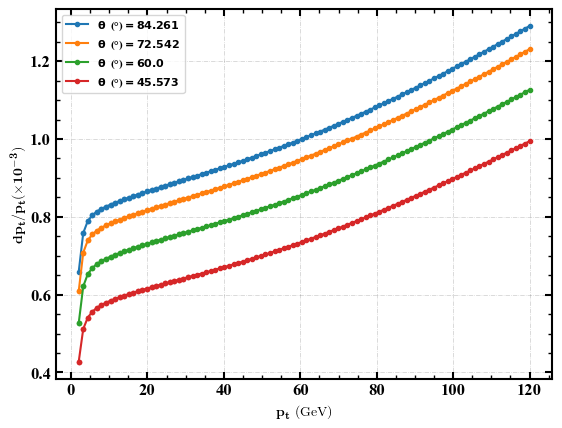

In [4]:
result.analytic_plot('p', 'dp', emit_mode = result.emit_mode)

In [5]:
try:
    os.mkdir("a_test2")
except Exception as e:
    print("folder exist", e)
result.export("a_test2", "a_test2", "analytic")

[WinError 183] 当文件已存在时，无法创建该文件。: 'a_test2'
start storing data to root file
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
B                    | double                   | AsDtype('>f8')
p                    | double                   | AsDtype('>f8')
theta                | double                   | AsDtype('>f8')
phi                  | double                   | AsDtype('>f8')
MS                   | double                   | AsDtype('>f8')
RE                   | double                   | AsDtype('>f8')
mass                 | double                   | AsDtype('>f8')
charge               | double                   | AsDtype('>f8')
beam_spot            | double                   | AsDtype('>f8')
dr                   | double                   | AsDtype('>f8')
dz                   | double                   | AsDtype('>f8')
dt                   | double                   

Please input the test number When create a Result object. or load the data from file.
analytic


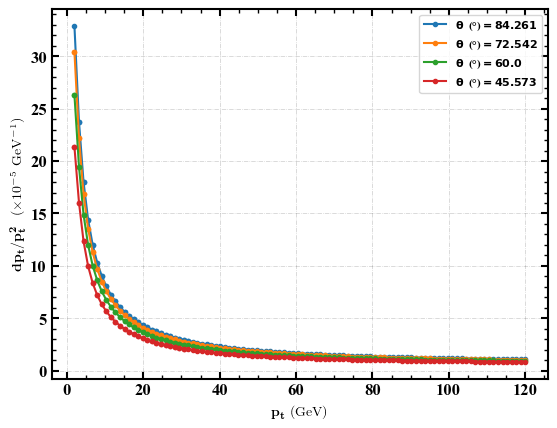

In [6]:
re_load = Result()
re_load.load_root("a_test2/a_test2.root")

re_load.analytic_plot('p', 'dp2', emit_mode = re_load.emit_mode)